In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import time as t
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer

In [80]:
data = pd.read_csv("/content/mushrooms.csv")

In [81]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [83]:
data.head(15)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [84]:
data["class"].unique()

array(['p', 'e'], dtype=object)

In [85]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

<Axes: xlabel='class', ylabel='count'>

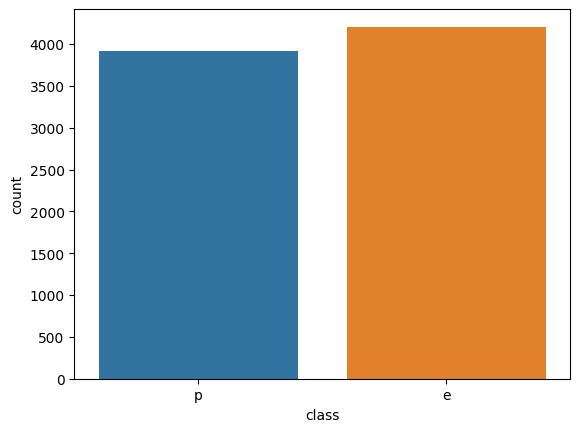

In [86]:
sns.countplot(data, x = data['class'])

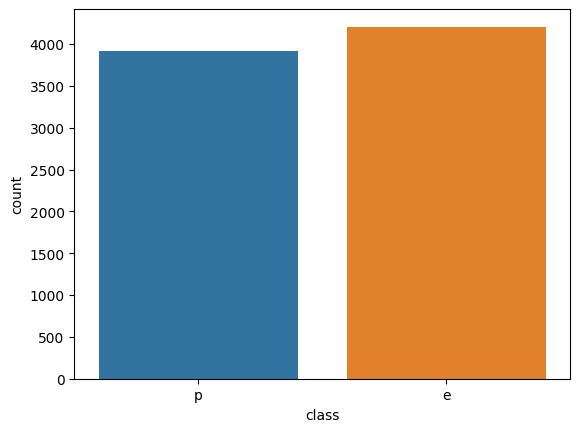

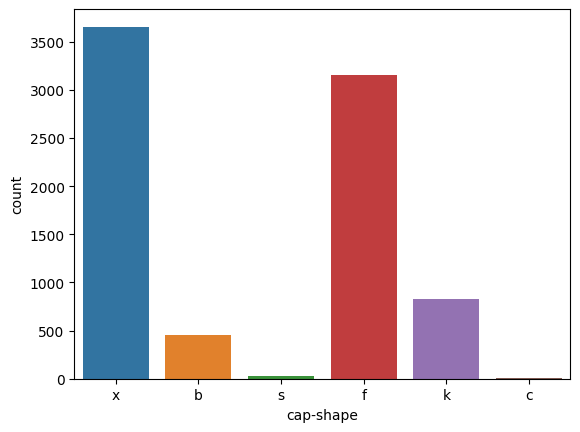

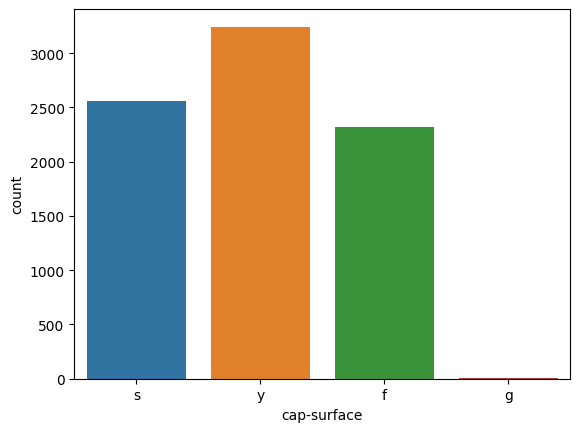

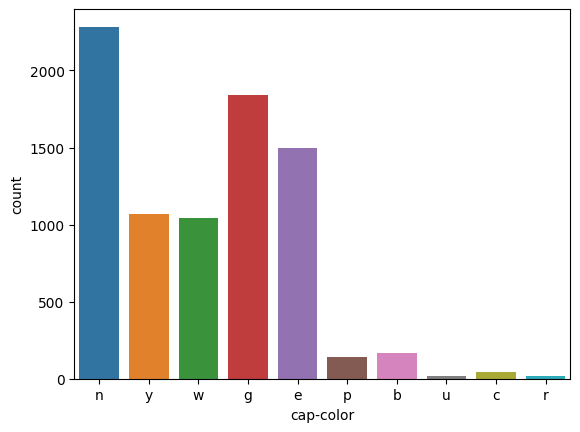

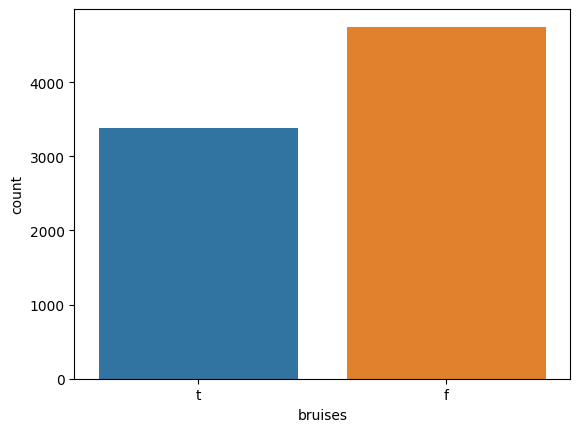

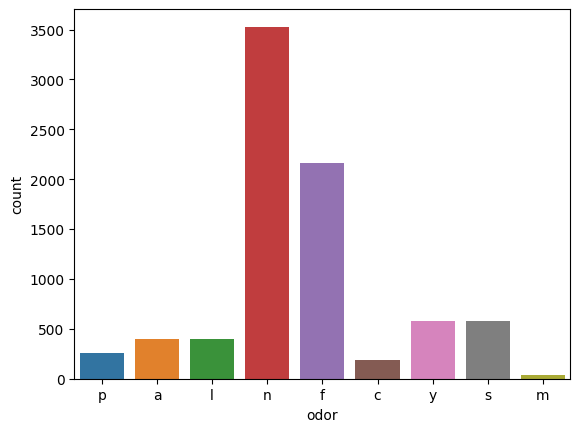

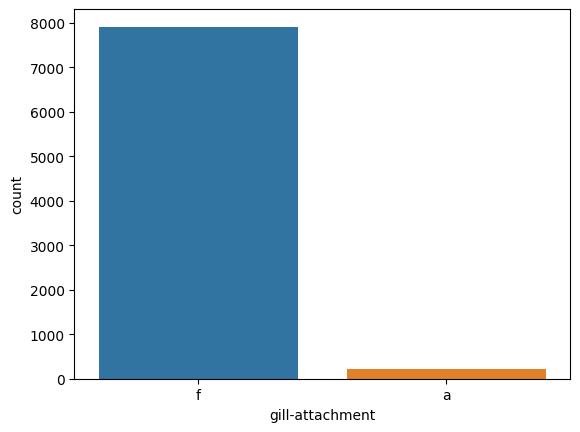

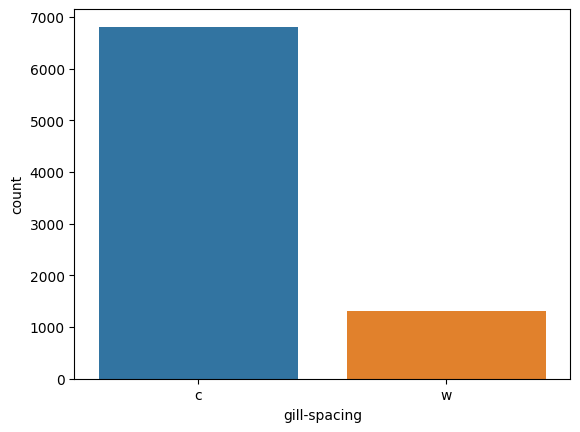

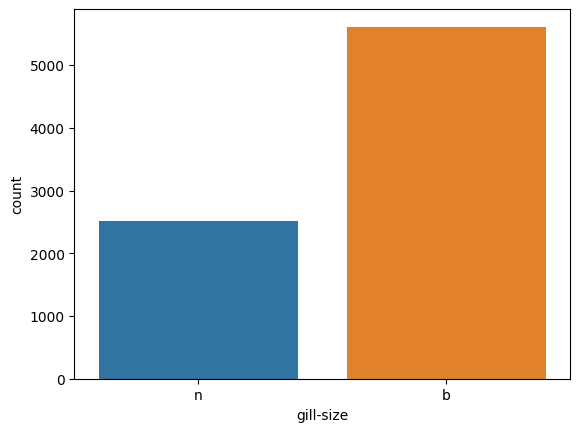

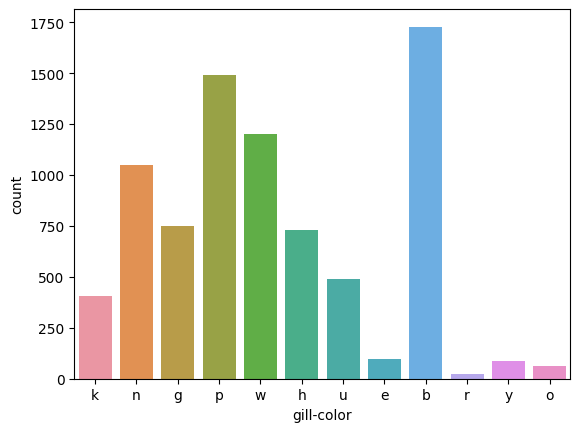

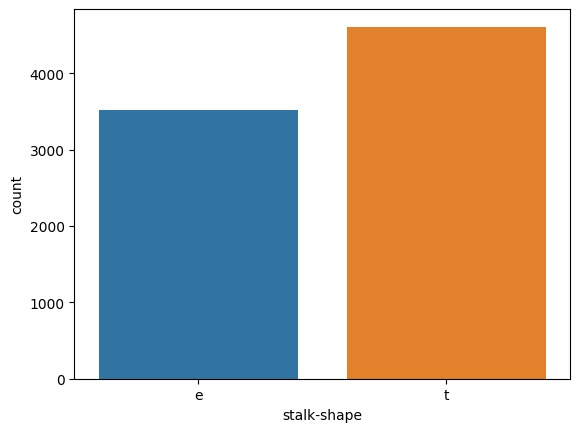

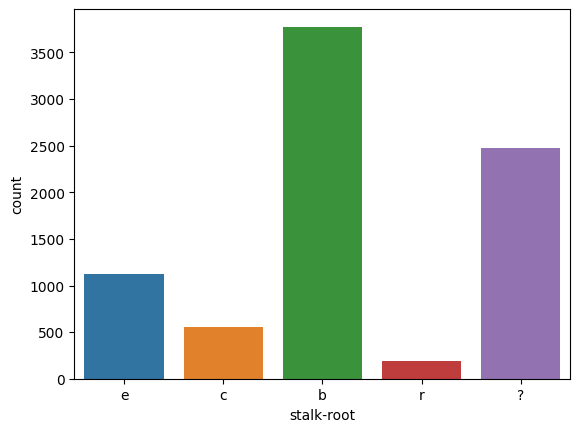

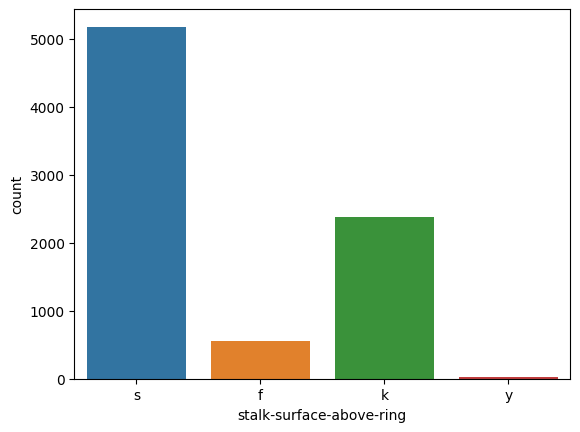

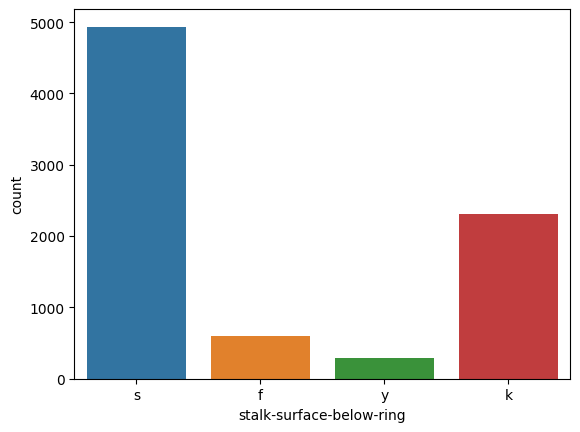

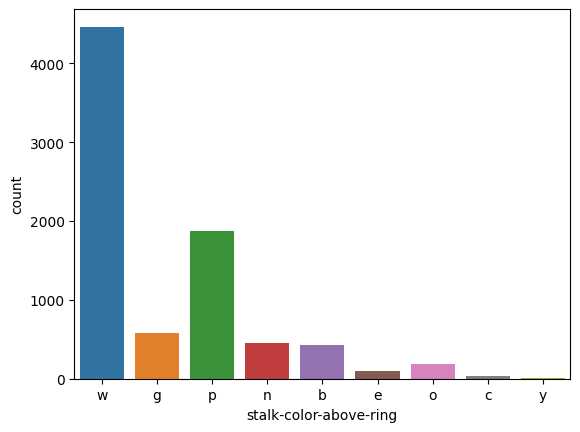

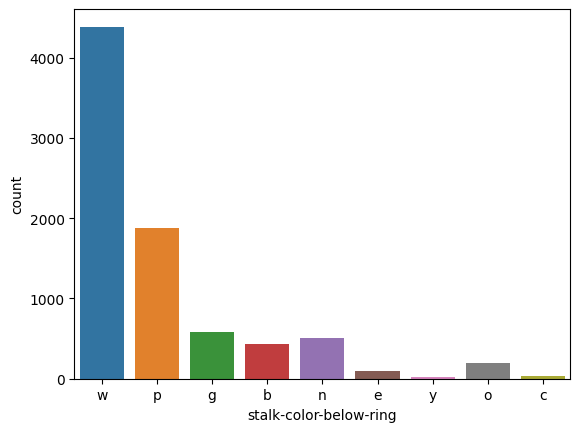

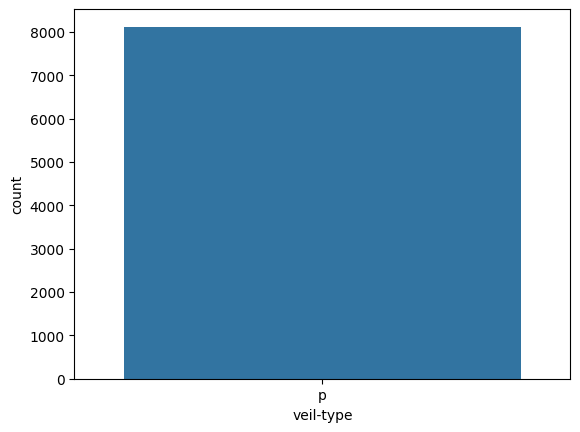

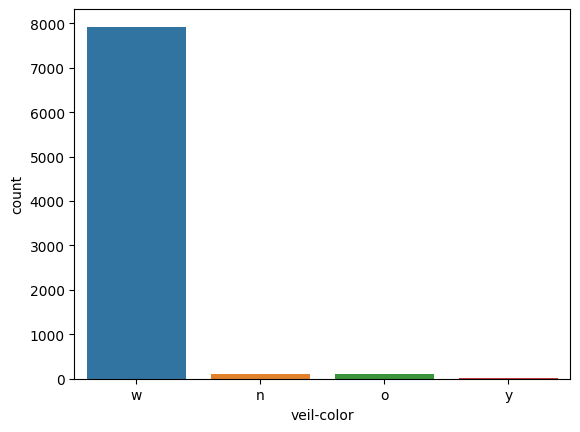

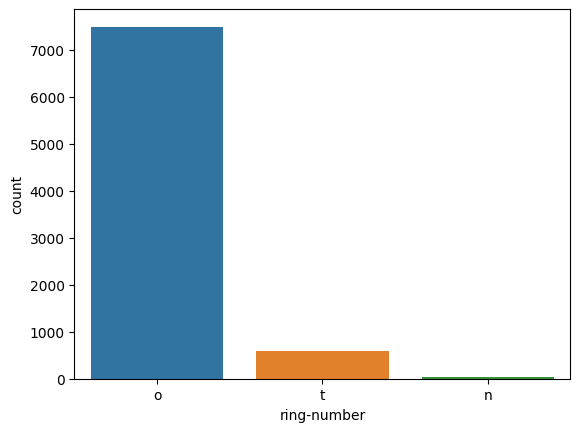

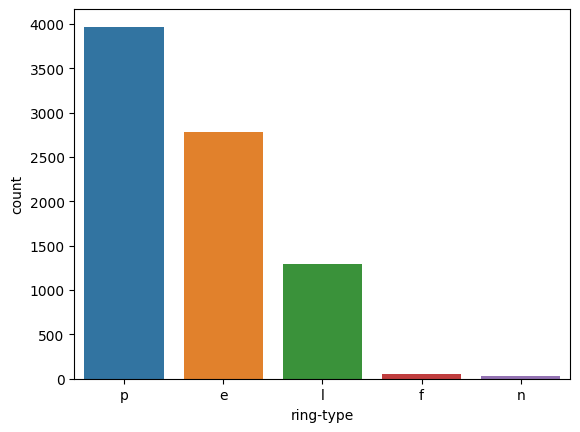

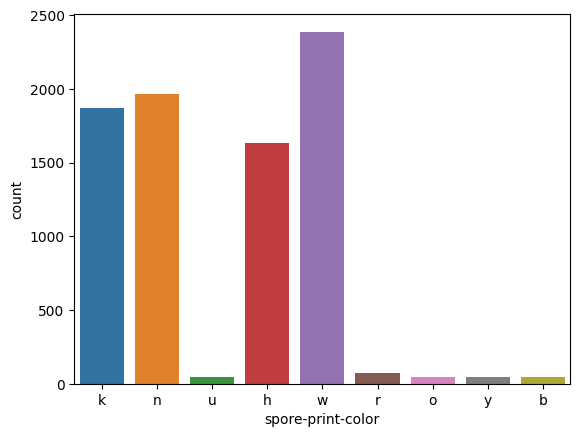

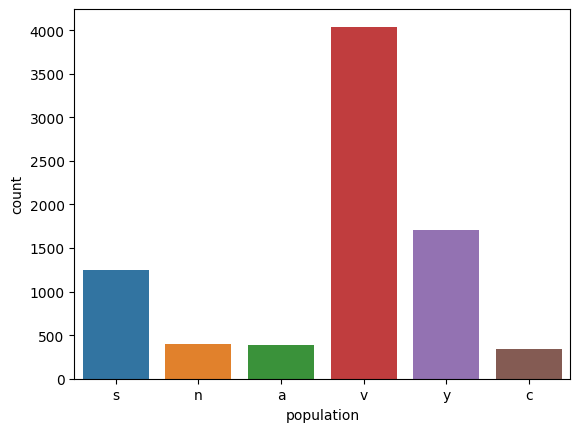

In [87]:
for i in range(0, 22, 1):
  plt.figure()
  sns.countplot(data, x= data.iloc[:, i])
  plt.show()

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [89]:
X = data.iloc[:, 1:22]
y = data.iloc[:, 0]

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [91]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6499 entries, 2893 to 5554
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 6499 non-null   object
 1   cap-surface               6499 non-null   object
 2   cap-color                 6499 non-null   object
 3   bruises                   6499 non-null   object
 4   odor                      6499 non-null   object
 5   gill-attachment           6499 non-null   object
 6   gill-spacing              6499 non-null   object
 7   gill-size                 6499 non-null   object
 8   gill-color                6499 non-null   object
 9   stalk-shape               6499 non-null   object
 10  stalk-root                6499 non-null   object
 11  stalk-surface-above-ring  6499 non-null   object
 12  stalk-surface-below-ring  6499 non-null   object
 13  stalk-color-above-ring    6499 non-null   object
 14  stalk-color-below-rin

In [92]:
ct = make_column_transformer(
    (OneHotEncoder(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
    remainder = "passthrough"
)
ct.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                  14, 15, 16, 17, 18, 19, 20])])

In [93]:
X_train_norm = ct.transform(X_train)
X_test_norm = ct.transform(X_test)

In [94]:
X_train_norm.shape, X_train.shape

((6499, 110), (6499, 21))

In [95]:
X_train_norm

<6499x110 sparse matrix of type '<class 'numpy.float64'>'
	with 136479 stored elements in Compressed Sparse Row format>

In [96]:
data["class"].unique()

array(['p', 'e'], dtype=object)

In [97]:
y_train.unique()

array(['e', 'p'], dtype=object)

In [101]:
y_train[y_train == 'e'] = 0.0
y_train[y_train == 'p'] = 1.0

y_train = y_train.astype(float)

In [104]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])
model.fit(X_train_norm,
          y_train,
          epochs = 100,
          verbose = 1,
          validation_data = [X_test_norm, y_test])

Epoch 1/100


InvalidArgumentError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_norm, y_train)
print(f"Test Accuracy: {model.score(X_test_norm, y_test)*100} %")

In [ ]:
from sklearn.naive_bayes import GaussianNB

model1 = GaussianNB()
model1.fit(X_train_norm, y_train)
print(f"Test Accuracy: {model1.score(X_test_norm, y_test)*100}%")